In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [3]:
def System(r,t):
    
    x=r[0]
    y=r[1]
    
  
    dx=2*x - y
    dy=x + 2*y
    
    return [dx,dy]

In [4]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]

    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    
    xc = x.copy()
    yc = y.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        y[i] = y[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        yc[i] = y[i]
        
        # Futuro
        futuro = np.array([x[i],y[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        yc[i] = yc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return xc,yc

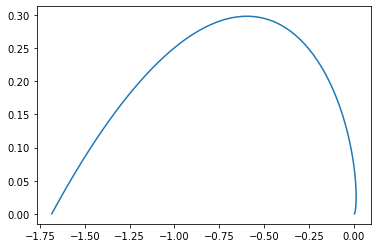

In [30]:
t = np.linspace(0,np.pi,1000)
h = t[1] - t[0]
r0 = [0+h,0]
sol = IntegratorAdams(System,r0,t)
solExact = odeint(System,r0,t)

plt.plot(sol[0],sol[1])


Sea el sistema autonomo:

$$
x´=2x-y
$$

$$
y´=x+2y
$$

La matriz de estabilidad se define como:

\begin{pmatrix}
\frac{\partial f(q_0,p_0)}{\partial q} & \frac{\partial f(q_0,p_0)}{\partial p}\\\frac{\partial g(q_0,p_0)}{\partial q} & \frac{\partial g(q_0,p_0)}{\partial p}
\end{pmatrix}

donde $(q_0,p_0)$ es un punto fijo. Para el sistema el punto (0,0) es un punto fijo, ya que $\dot{q} = x´=0$

Entonces la matriz de estabilidad para el punto $(0,0)$:

\begin{pmatrix}
2 & -1 \\ 1 & 2
\end{pmatrix}



In [31]:
M=np.array([[2,-1],[1,2]])

Values,vectors=np.linalg.eig(M)

Values, vectors


(array([2.+1.j, 2.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

Los autovalores de la matriz son: $\lambda= 2+i$,  $\lambda= 2-i$, por lo que el punto critico (0,0) es un punto fijo inestable. Las soluciones van a oscilar alrededor del origen, pero su magnitud crecera con el tiempo.

Text(0.5, 1.0, 'Trayectorias en el espacio de fase para diferentes condiciones iniciales')

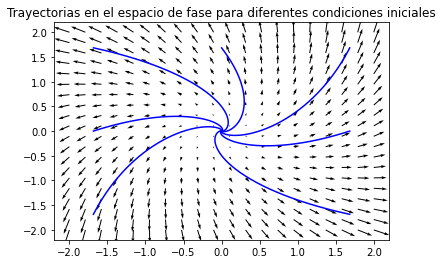

In [39]:

fig=plt.figure()
ax=fig.add_subplot()

r=[(0+h,0),(0-h,0),(0+h,0+h),(0,0-h),(0-h,0-h),(0+h,0-h),(0-h,0+h)]

for i in r:  

    sol_ = IntegratorAdams(System,i,t)
    ax.plot(sol_[0],sol_[1],c="b")
   
  
    

x_,y_ = np.meshgrid(np.linspace(-2,2,20),np.linspace(-2,2,20))    
ax.quiver(x_,y_,System([x_,y_],t)[0],System([x_,y_],t)[1])
ax.set_title(label="Trayectorias en el espacio de fase para diferentes condiciones iniciales")